In [ ]:
pip install numpy==1.25.0 scipy tensorflow==2.15.0 hls4ml pydot graphviz

In [1]:
import hls4ml

In [2]:
from tensorflow.keras.models import load_model

2026-02-20 17:44:28.105950: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-20 17:44:28.127079: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-20 17:44:28.232531: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-02-20 17:44:28.232551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-02-20 17:44:28.250659: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
import os
# os.environ['PATH']='/opt/Xilinx/Vivado/2018.2/bin/vivado:'+os.environ['PATH']
# os.environ['PATH']='/opt/Xilinx/Vivado/2018.2/bin/vivado_hls:'+os.environ['PATH']
os.environ['PATH']='/opt/Xilinx/Vivado/2018.2/bin:'+os.environ['PATH']


In [4]:
model=load_model('model_2_15.keras')

2026-02-20 17:44:31.473571: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-20 17:44:31.555460: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
print(len(model.layers))

13


In [6]:
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
for layer in config['LayerName'].keys():
    config['LayerName'][layer]['Precision'] = {
        'weight': 'ap_fixed<16,6>',
        'bias':   'ap_fixed<16,6>',
        'result': 'ap_fixed<16,6>'
    }
config['Model']['ReuseFactor'] = 32
config['Model']['Strategy'] = 'Resource'

In [ ]:
!ls -F

CIFAR10_NO_BN_FN_LITE_2856_R.ipynb*  PhasePlaneAnalysis2.pptx*
model.keras			     vlsi_hls4ml-working.ipynb


In [7]:
print("-----------------------------------")
print("Configuration")
# plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, output_dir='hls4ml_prj' , part='xc7z010clg400-1',backend='Vivado'
)

-----------------------------------
Configuration
-----------------------------------


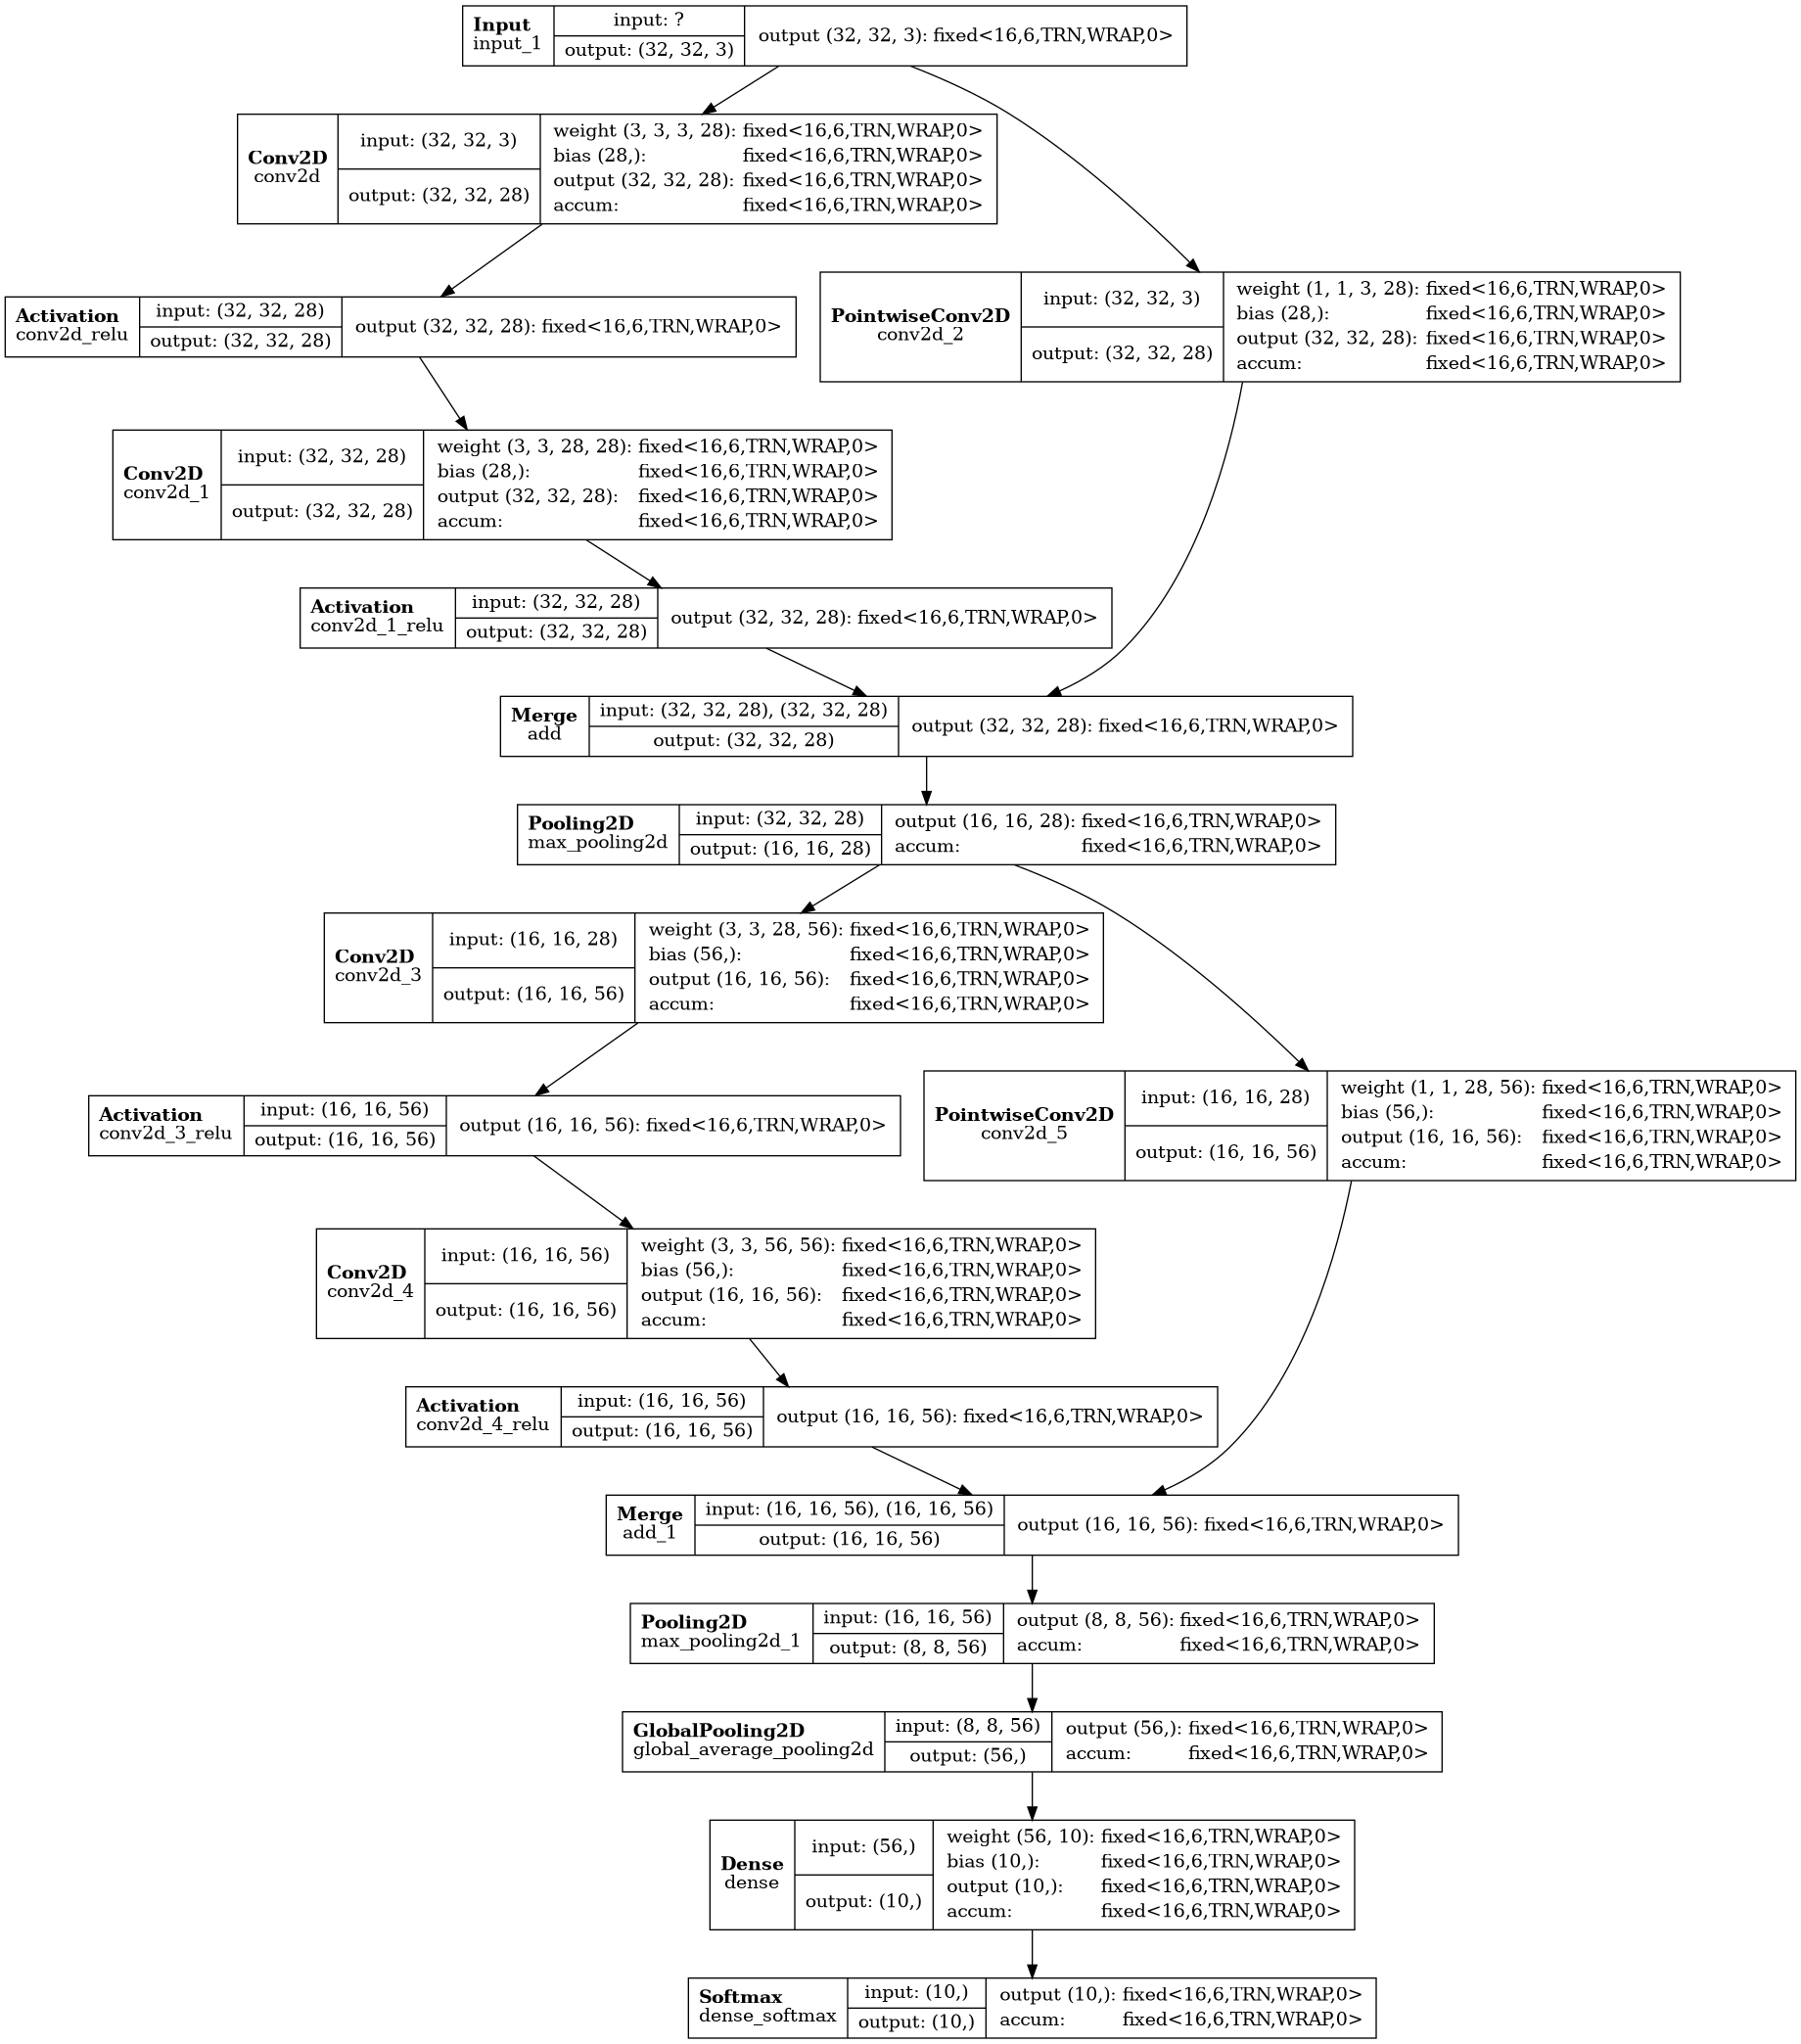

In [8]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)


In [8]:
hls_model.write()


In [9]:
os.environ['PATH']

'/opt/Xilinx/Vivado/2018.2/bin:/home/robotics/Desktop/bharat-ai-soc-student-challenge/.venv310/bin:/home/robotics/Desktop/bharat-ai-soc-student-challenge/.venv310/bin:/home/robotics/.local/bin:/home/robotics/.opencode/bin:/tools/Xilinx/Vitis_HLS/2022.2/bin:/tools/Xilinx/Vitis/2022.2/bin:/tools/Xilinx/Vivado/2022.2/bin:/tools/Xilinx/Vitis_HLS/2022.2/bin:/tools/Xilinx/Vivado/2022.2/bin:/tools/Xilinx/Vitis/2022.2/bin:/tools/Xilinx/Vitis/2022.2/gnu/microblaze/lin/bin:/tools/Xilinx/Vitis/2022.2/gnu/arm/lin/bin:/tools/Xilinx/Vitis/2022.2/gnu/microblaze/linux_toolchain/lin64_le/bin:/tools/Xilinx/Vitis/2022.2/gnu/aarch32/lin/gcc-arm-linux-gnueabi/bin:/tools/Xilinx/Vitis/2022.2/gnu/aarch32/lin/gcc-arm-none-eabi/bin:/tools/Xilinx/Vitis/2022.2/gnu/aarch64/lin/aarch64-linux/bin:/tools/Xilinx/Vitis/2022.2/gnu/aarch64/lin/aarch64-none/bin:/tools/Xilinx/Vitis/2022.2/gnu/armr5/lin/gcc-arm-none-eabi/bin:/tools/Xilinx/Vitis/2022.2/tps/lnx64/cmake-3.3.2/bin:/tools/Xilinx/Vitis/2022.2/aietools/bin:/opt/ro

In [11]:
print(f"Current Backend: {hls_model.config.backend}")

Current Backend: <hls4ml.backends.vivado.vivado_backend.VivadoBackend object at 0x7f779ff66530>


In [9]:
hls_model.compile()

In [11]:
!which vivado_hls

/opt/Xilinx/Vivado/2018.2/bin/vivado_hls


In [ ]:
# Use Vivado HLS to synthesize the model
# This might take several minutes
hls_model.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2018.2 (64-bit)
  **** SW Build 2258646 on Thu Jun 14 20:02:38 MDT 2018
  **** IP Build 2256618 on Thu Jun 14 22:10:49 MDT 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source /opt/Xilinx/Vivado/2018.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/opt/Xilinx/Vivado/2018.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'robotics' on host 'robotics' (Linux_x86_64 version 6.17.0-14-generic) on Thu Feb 19 23:52:01 IST 2026
INFO: [HLS 200-10] On os Ubuntu 24.04.3 LTS
INFO: [HLS 200-10] In directory '/home/robotics/Documents/bharat-ai-soc-student-challenge/New_Train/hls4ml_prj'
INFO: [HLS 200-10] Opening project '/home/robotics/Documents/bharat-ai-soc-student-challenge/New_Train/hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HL

In [5]:
# Print out the report if you want
hls4ml.report.read_vivado_report('/home/robotics/Documents/bharat-ai-soc-student-challenge/New_Train/hls4ml_prj/')

Found 1 solution(s) in /home/robotics/Documents/bharat-ai-soc-student-challenge/New_Train/hls4ml_prj//myproject_prj.
Reports for solution "solution1":

C simulation report not found.
Synthesis report not found.
Co-simulation report not found.
